In [2]:
from PIL import Image
from PIL import ImageFilter
pic = Image.open("12.jpg")

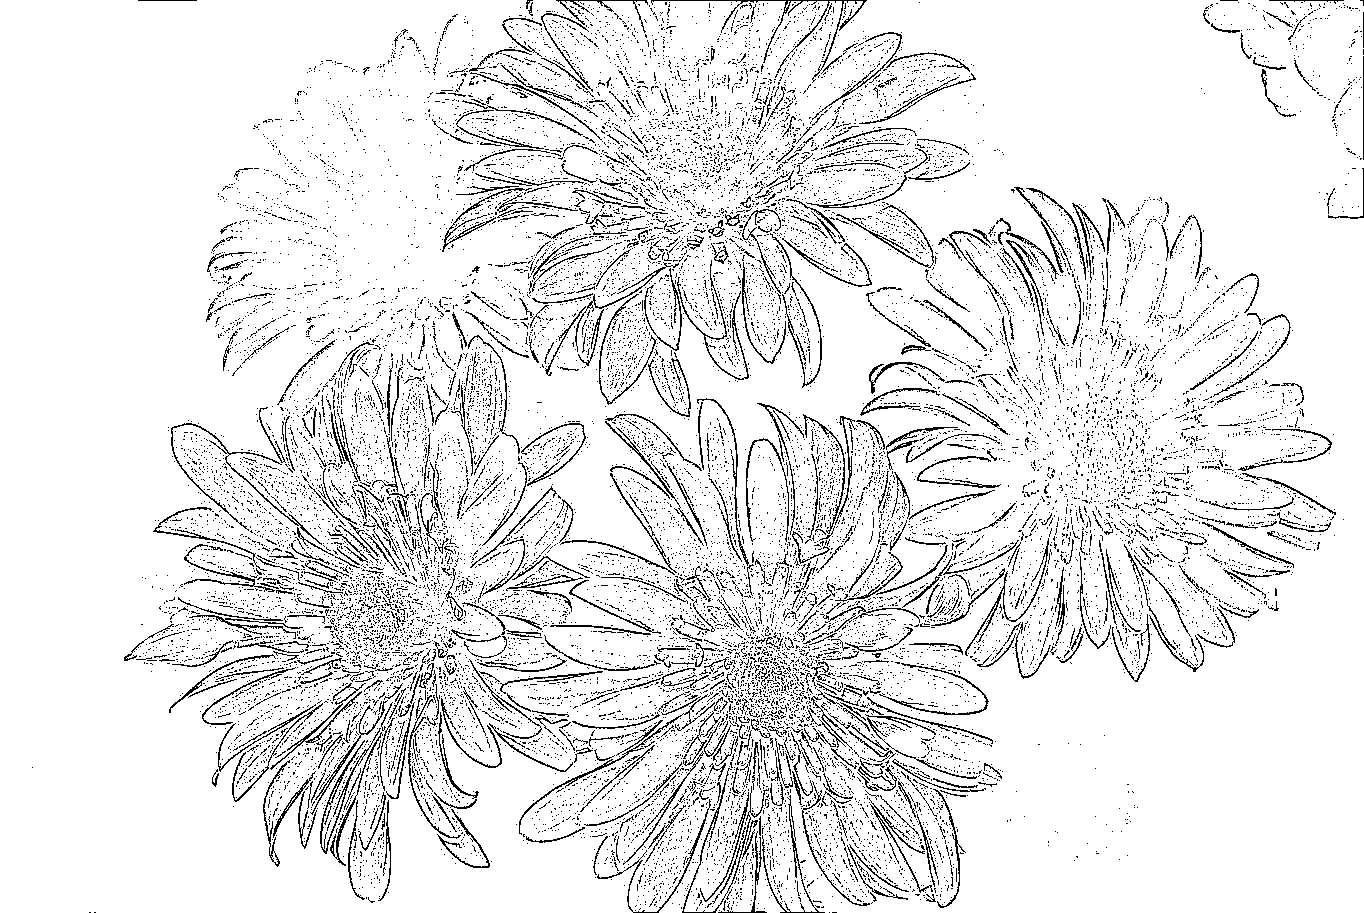

In [3]:
smaller = pic.resize((500, 500))
edges = pic.filter(ImageFilter.FIND_EDGES)
bands = edges.split()
flower = bands[0].point(lambda x: 255 if x < 60 else 0)
flower

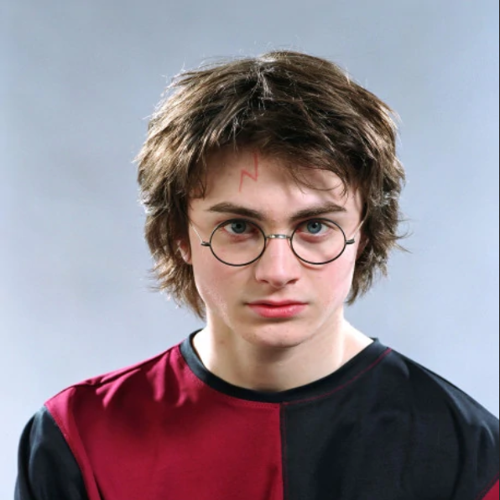

In [3]:
from PIL import ImageFont
from PIL import ImageDraw
import random
harry = Image.open("Garry.png")
smalleharry = harry.resize((500, 500))
smalleharry

In [11]:
rgblist = smalleharry.split()
zeroed_band = rgblist[0].point(lambda x: x * 0)
splitedrgb = ['r', 'g', 'b', 'zeroed_band']
font = ImageFont.truetype("arial.ttf", 20)

def create_rgb():
    rgblist2 = []
    for i in range(4):
        rgblist2.append(rgblist[i])   
    rgblist2.append(zeroed_band)
    arr = []
    for i in range(10):
        text_line = ' '
        sampled_list = random.sample(splitedrgb, 3)
        sampled_list2 = []
        for p in range(3):
            name_c = sampled_list[p]
            if p == 0 or p == 2:
                text_line = text_line + name_c
            else:
                text_line = text_line + ' + ' + name_c + ' + '
            for m in range(4):
                if name_c == splitedrgb[m]:
                    name_c = rgblist2[m]
            sampled_list2.append(name_c)
        rgb_out = Image.merge("RGB", (sampled_list2[0], sampled_list2[1], sampled_list2[2]))
        drawer = ImageDraw.Draw(rgb_out)
        drawer.line((500, 490, 0, 490), fill='black', width=25)
        drawer.text((0, 475), text_line, font = font, fill = 'white')
        arr.append(rgb_out) 
    return arr

def create_collage(width, height):
    newarr = create_rgb()
    cols = 3
    rows = 3
    newHarry = Image.new('RGB', (width, height))
    i = 0
    x = 0
    y = 0
    for col in range(cols):
        for row in range(rows):
            newHarry.paste(newarr[i], (x, y))
            i += 1
            y += 500
        x += 500
        y = 0
    return newHarry

create_collage(1500, 1500).save('Collage1.png')
create_collage(1500, 1500).save('Collage2.png')
create_collage(1500, 1500).save('Collage3.png')